In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from numpy import log
import time

from keras.models import Sequential

from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

import matplotlib.pyplot as plt

from keras.layers import Dense, LeakyReLU
from keras.activations import elu
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU

In [2]:
class EuropeanOptionBS:
    def __init__(self, S, K, T, r, q, sigma, Type):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma
        self.Type = Type
        self.d1 = self.d1()
        self.d2 = self.d2()
        self.price = self.price()

    def d1(self):
        d1 = (math.log(self.S / self.K) +
              (self.r - self.q + 0.5 * (self.sigma ** 2)) * self.T) / \
             (self.sigma * math.sqrt(self.T))
        return d1

    def d2(self):
        d2 = self.d1 - self.sigma * math.sqrt(self.T)
        return d2

    def price(self):
        if self.Type == "Call":
            price = self.S * math.exp(-self.q * self.T) * norm.cdf(self.d1) - \
                    self.K * math.exp(-self.r * self.T) * norm.cdf(self.d2)
        if self.Type == "Put":
            price = self.K * math.exp(-self.r * self.T) * norm.cdf(-self.d2) - \
                    self.S * math.exp(-self.q * self.T) * norm.cdf(-self.d1)
        return price

In [3]:
# Dataset
r = np.arange(0.0, 0.1, 0.01)  # interest rates
Strike = np.arange(50, 155, 5)  # strike price
T = np.arange(0.1, 2.1, 0.1)  # time to maturity
sigma = np.arange(0.1, 2.1, 0.1)  # volatility


data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                
                price = EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price
                
                data.append([r_, Strike_, T_, sigma_, price])


data = np.asarray(data)

In [4]:
# Dataset
r = np.arange(0.0, 0.1, 0.01)  # interest rates
Strike = np.arange(50, 155, 5)  # strike price
T = np.arange(0.1, 2.1, 0.1)  # time to maturity
sigma = np.arange(0.1, 2.1, 0.1)  # volatility
stock_price = 100

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                price = EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price
                
                
                option_stock_ratio = price / stock_price
                strike_stock_ratio = Strike_ / stock_price
                data.append([r_, strike_stock_ratio, T_, sigma_, option_stock_ratio])


data = np.asarray(data)

In [5]:

# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = data[:, 4]  # call price



In [6]:
model_ML = Sequential()

model_ML.add(Dense(30, input_dim=4))
model_ML.add(LeakyReLU())
model_ML.add(Dense(60))
model_ML.add(ELU())
model_ML.add(Dense(90))
model_ML.add(LeakyReLU())
model_ML.add(Dense(1))

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = data[:, 4]  # call price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67200, 4), (16800, 4), (67200,), (16800,))

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:

# Initialize the scaler
#scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)



In [8]:
model_ML.compile(loss='mean_squared_error', optimizer='adam')


In [9]:
history_model_ML = model_ML.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [10]:
final_loss = history_model_ML.history['loss'][-1]
print(f"   Last log loss: {final_loss:.10f}")

   Last log loss: 0.0000048437


In [11]:
y_pred_ML = model_ML.predict(X_test)
rmse_ML = np.sqrt(mean_squared_error(y_test,y_pred_ML))
mae_ML = mean_absolute_error(y_test, y_pred_ML)
mse_ML = mean_squared_error(y_test,y_pred_ML)
print(f"   MSA: {rmse_ML:.10f}")
print(f"   MAE: {mae_ML :.10f}")
print(f"   MSE: {mse_ML :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)))

525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
   MSA: 0.0018000903
   MAE: 0.0013187795
   MSE: 0.0000032403
r-squared = 1.000


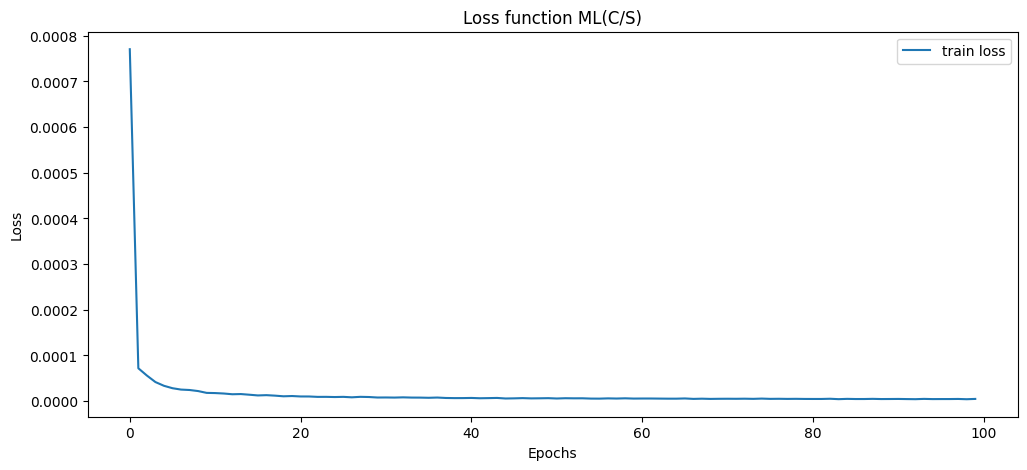

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
x_x = history_model_ML.history["loss"]
ax.plot(history_model_ML.history["loss"], label="train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss function ML(C/S)')
#ax.plot(history.history["accuracy"], label="train accuracy")
#ax.plot(history.history["val_loss"], label="validation loss")
#ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

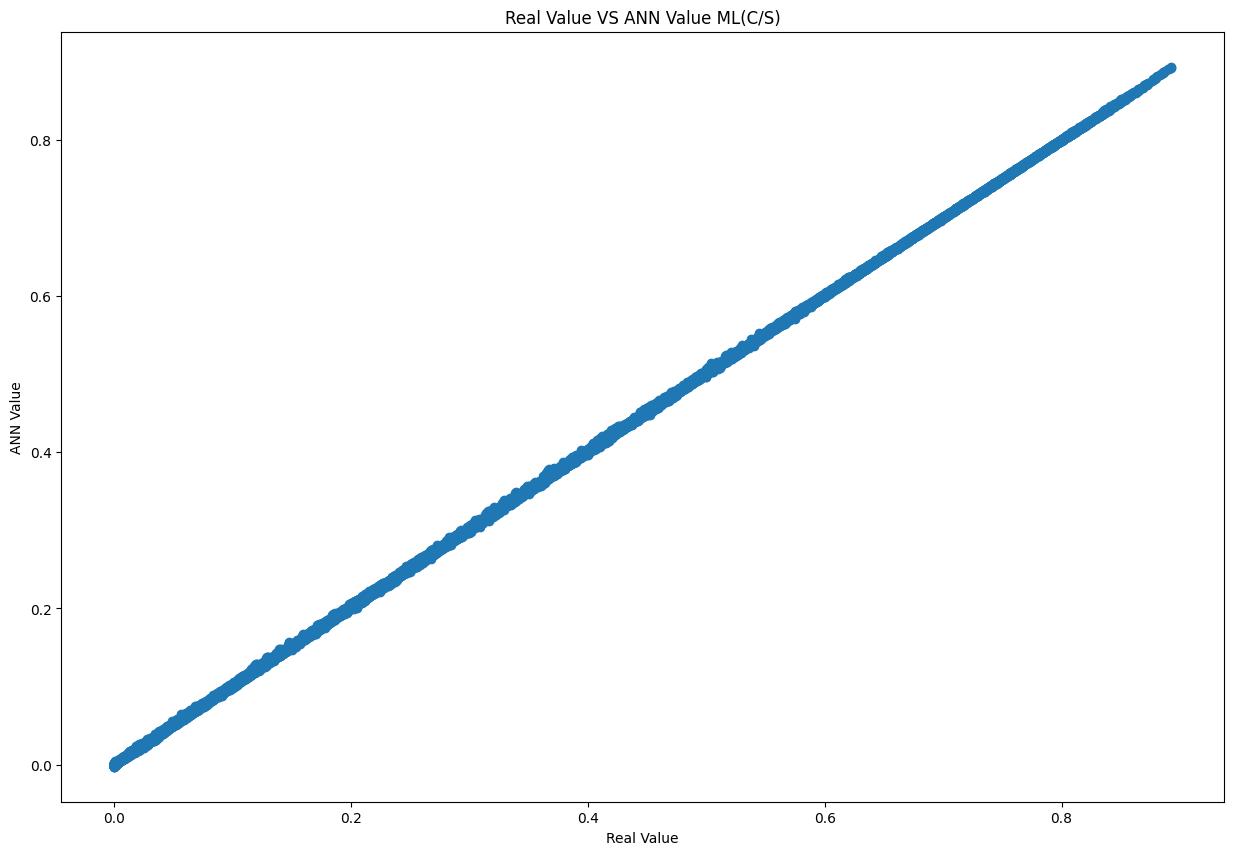

In [13]:

# Comparison of real values and predictions on the test dataset
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred_ML)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)), (20, 1), size=15)
plt.title('Real Value VS ANN Value ML(C/S)')
plt.show()

fractions statistics
Min: -3.693691596359393e+35
Max: 370579093.19818705
Mean: -2.19862595030144e+31
Std: 2.8496601201258943e+33


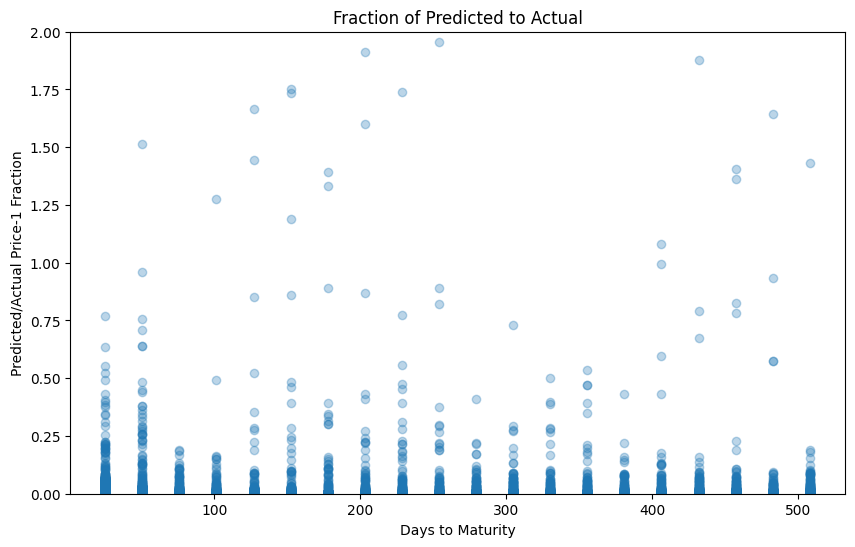

In [14]:

#y_test = y_test.reset_index(drop=True)
newper_y_pred_ML = pd.Series(y_pred_ML.flatten(), name='Predictions')
# Combine them into a DataFrame
frac__ML = pd.DataFrame({'Actual': y_test, 'Predicted': newper_y_pred_ML})

y_testf = frac__ML['Actual'].values
y_predf = frac__ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 2]*254,fractionsf, 'o', alpha=0.3)
plt.xlabel('Days to Maturity')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

In [15]:

# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = log(data[:, 4])  # call price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
history_model_ML = model_ML.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [17]:
final_loss = history_model_ML.history['loss'][-1]
print(f"   Last log loss: {final_loss:.10f}")

   Last log loss: 0.0240514614


In [18]:
y_pred_ML = model_ML.predict(X_test)
rmse_ML = np.sqrt(mean_squared_error(y_test,y_pred_ML))
mae_ML = mean_absolute_error(y_test, y_pred_ML)
mse_ML = mean_squared_error(y_test,y_pred_ML)
print(f"   MSA: {rmse_ML:.10f}")
print(f"   MAE: {mae_ML :.10f}")
print(f"   MSE: {mse_ML :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)))

525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
   MSA: 0.1316607460
   MAE: 0.0407155033
   MSE: 0.0173345520
r-squared = 0.997


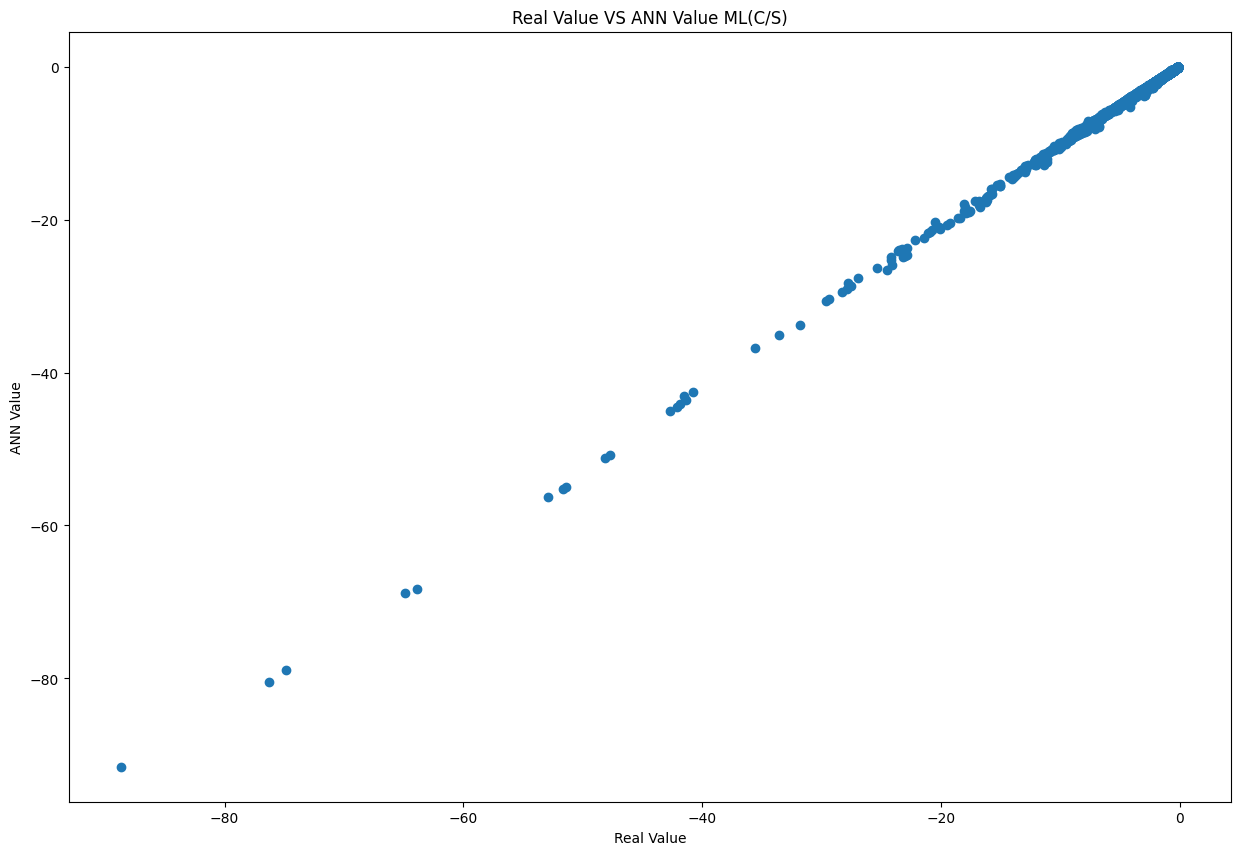

In [19]:

# Comparison of real values and predictions on the test dataset
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred_ML)
plt.xlabel("Real Value")
plt.ylabel("ANN Value")
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)), (20, 1), size=15)
plt.title('Real Value VS ANN Value ML(C/S)')
plt.show()

In [20]:
data = np.column_stack((y_test, y_pred_ML))
np.savetxt('y_test_y_pred.csv', data, delimiter=',', header='y_test,y_pred', comments='')


In [21]:
datafrac = pd.read_csv('y_test_y_pred.csv')

fractions statistics
Min: -0.8699502675487625
Max: 0.27995522533929207
Mean: -0.034287281066399
Std: 0.059653366421663315


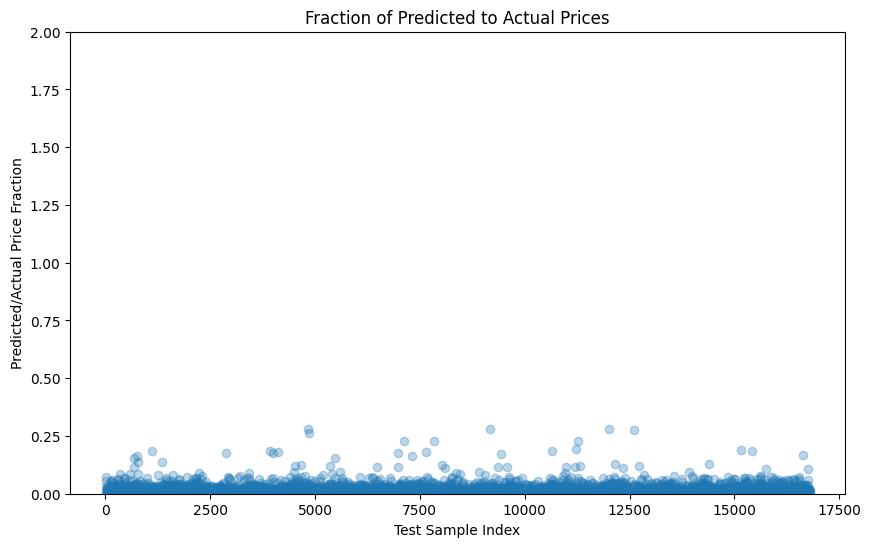

In [22]:
y_testf = datafrac['y_test'].values
y_predf = datafrac['y_pred'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(fractionsf, 'o', alpha=0.3)
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted/Actual Price Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

fractions statistics
Min: -0.8699502675487625
Max: 0.27995522533929185
Mean: -0.034287281066399
Std: 0.05965336642166331


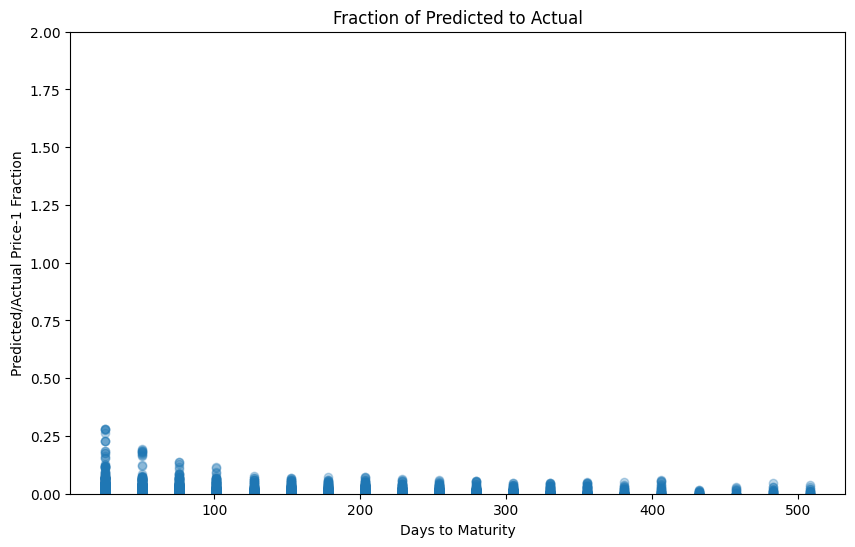

In [23]:

#y_test = y_test.reset_index(drop=True)
newper_y_pred_ML = pd.Series(y_pred_ML.flatten(), name='Predictions')
# Combine them into a DataFrame
frac__ML = pd.DataFrame({'Actual': y_test, 'Predicted': newper_y_pred_ML})

y_testf = frac__ML['Actual'].values
y_predf = frac__ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 2]*254,fractionsf, 'o', alpha=0.3)
plt.xlabel('Days to Maturity')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

In [27]:
# Dataset
r = np.arange(0.0, 0.1, 0.01)  # interest rates
Strike = np.arange(50, 155, 5)  # strike price
T = np.arange(0.1, 1.1, 0.1)  # time to maturity
sigma = np.arange(0.1, 2.1, 0.1)  # volatility
stock_price = 100

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                price = EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price
                
                
                option_stock_ratio = price / stock_price
                strike_stock_ratio = Strike_ / stock_price
                data.append([r_, strike_stock_ratio, T_, sigma_, option_stock_ratio])


data = np.asarray(data)

In [29]:
data.shape

(42000, 5)

In [28]:
# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = log(data[:, 4])  # call price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 4), (8400, 4), (33600,), (8400,))

In [ ]:
model_ML = Sequential()

model_ML.add(Dense(30, input_dim=4))
model_ML.add(LeakyReLU())
model_ML.add(Dense(60))
model_ML.add(ELU())
model_ML.add(Dense(90))
model_ML.add(LeakyReLU())
model_ML.add(Dense(1))

In [30]:
model_ML.compile(loss='mean_squared_error', optimizer='adam')
history_model_ML = model_ML.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [31]:
final_loss = history_model_ML.history['loss'][-1]
print(f"   Last log loss: {final_loss:.10f}")

   Last log loss: 0.0176888388


In [32]:

y_pred_ML = model_ML.predict(X_test)
rmse_ML = np.sqrt(mean_squared_error(y_test,y_pred_ML))
mae_ML = mean_absolute_error(y_test, y_pred_ML)
mse_ML = mean_squared_error(y_test,y_pred_ML)
print(f"   MSA: {rmse_ML:.10f}")
print(f"   MAE: {mae_ML :.10f}")
print(f"   MSE: {mse_ML :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)))

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
   MSA: 0.0408183593
   MAE: 0.0218298431
   MSE: 0.0016661385
r-squared = 1.000


fractions statistics
Min: -0.8699502675487625
Max: 0.27995522533929207
Mean: -0.034287281066399
Std: 0.059653366421663315


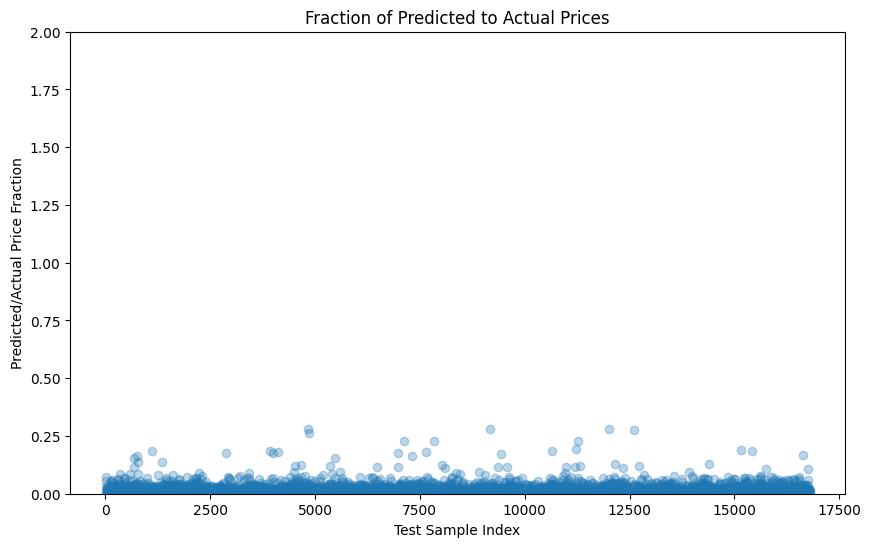

In [34]:
y_testf = datafrac['y_test'].values
y_predf = datafrac['y_pred'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(fractionsf, 'o', alpha=0.3)
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted/Actual Price Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

fractions statistics
Min: -0.23765303340938737
Max: 0.09101469812710627
Mean: -0.013065514862112793
Std: 0.023301989367105612


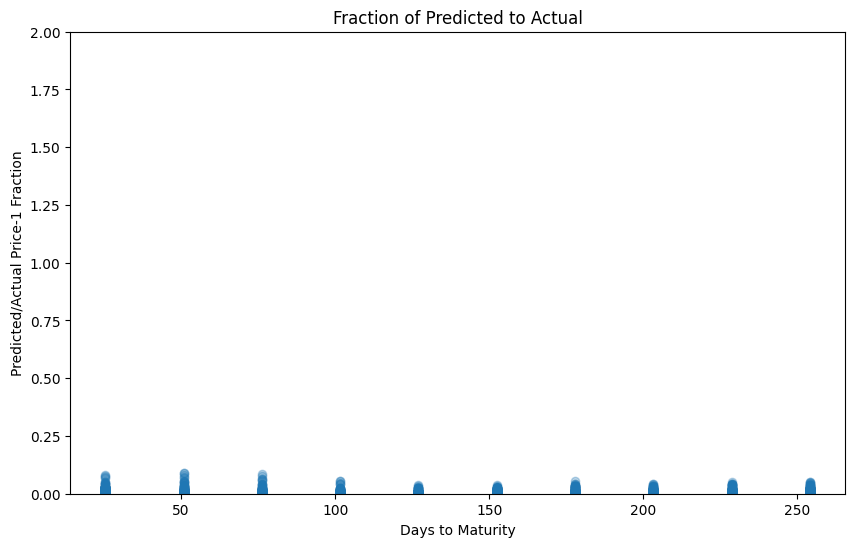

In [35]:

#y_test = y_test.reset_index(drop=True)
newper_y_pred_ML = pd.Series(y_pred_ML.flatten(), name='Predictions')
# Combine them into a DataFrame
frac__ML = pd.DataFrame({'Actual': y_test, 'Predicted': newper_y_pred_ML})

y_testf = frac__ML['Actual'].values
y_predf = frac__ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 2]*254,fractionsf, 'o', alpha=0.3)
plt.xlabel('Days to Maturity')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

In [36]:
r = np.arange(0.0, 0.1, 0.01)  # interest rates
Strike = np.arange(50, 155, 5)  # strike price
T = np.arange(0.1, 0.6, 0.1)  # time to maturity
sigma = np.arange(0.1, 2.1, 0.1)  # volatility
stock_price = 100

data = []
for r_ in r:
    for Strike_ in Strike:
        for T_ in T:
            for sigma_ in sigma:
                price = EuropeanOptionBS(100, Strike_, T_, r_, 0, sigma_, "Call").price
                
                
                option_stock_ratio = price / stock_price
                strike_stock_ratio = Strike_ / stock_price
                data.append([r_, strike_stock_ratio, T_, sigma_, option_stock_ratio])


data = np.asarray(data)

In [37]:
data.shape

(21000, 5)

In [38]:
# Test and train datasets
X = data[:, :4]  # params r, strike, T, sigma
y = log(data[:, 4])  # call price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16800, 4), (4200, 4), (16800,), (4200,))

In [39]:
model_ML = Sequential()

model_ML.add(Dense(30, input_dim=4))
model_ML.add(LeakyReLU())
model_ML.add(Dense(60))
model_ML.add(ELU())
model_ML.add(Dense(90))
model_ML.add(LeakyReLU())
model_ML.add(Dense(1))

C:\Users\spin 3\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model_ML.compile(loss='mean_squared_error', optimizer='adam')
history_model_ML = model_ML.fit(X_train, y_train, epochs=100, batch_size=15, verbose=0)

In [41]:
final_loss = history_model_ML.history['loss'][-1]
print(f"   Last log loss: {final_loss:.10f}")
y_pred_ML = model_ML.predict(X_test)
rmse_ML = np.sqrt(mean_squared_error(y_test,y_pred_ML))
mae_ML = mean_absolute_error(y_test, y_pred_ML)
mse_ML = mean_squared_error(y_test,y_pred_ML)
print(f"   MSA: {rmse_ML:.10f}")
print(f"   MAE: {mae_ML :.10f}")
print(f"   MSE: {mse_ML :.10f}") 
print("r-squared = {:.3f}".format(r2_score(y_test, y_pred_ML)))

   Last log loss: 0.1062733382
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
   MSA: 0.1004519743
   MAE: 0.0441224460
   MSE: 0.0100905991
r-squared = 1.000


In [44]:
data = np.column_stack((y_test, y_pred_ML))
np.savetxt('y_test_y_pred.csv', data, delimiter=',', header='y_test,y_pred', comments='')
datafrac = pd.read_csv('y_test_y_pred.csv')

fractions statistics
Min: -0.6262813891184509
Max: 0.12845785740027638
Mean: -0.00933624378643713
Std: 0.036820585963933984


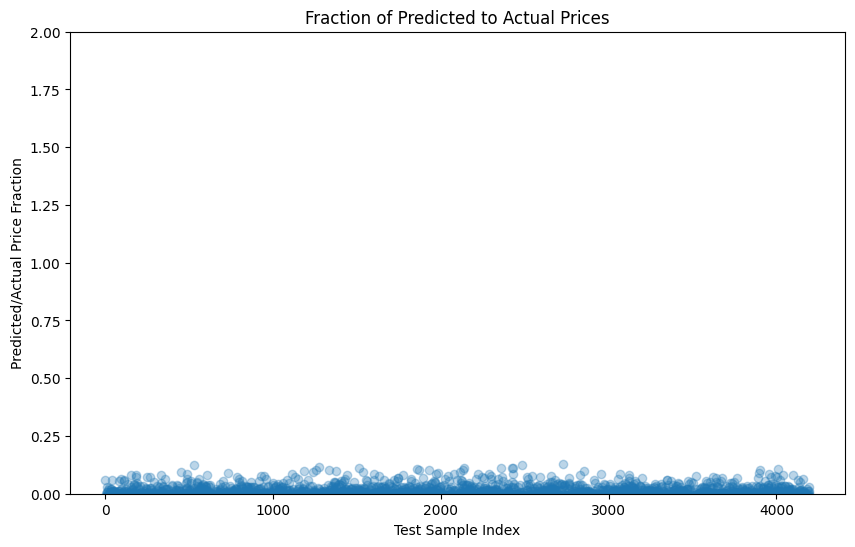

In [45]:
y_testf = datafrac['y_test'].values
y_predf = datafrac['y_pred'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(fractionsf, 'o', alpha=0.3)
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted/Actual Price Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

fractions statistics
Min: -0.6262813891184508
Max: 0.12845785740027615
Mean: -0.009336243786437128
Std: 0.036820585963933984


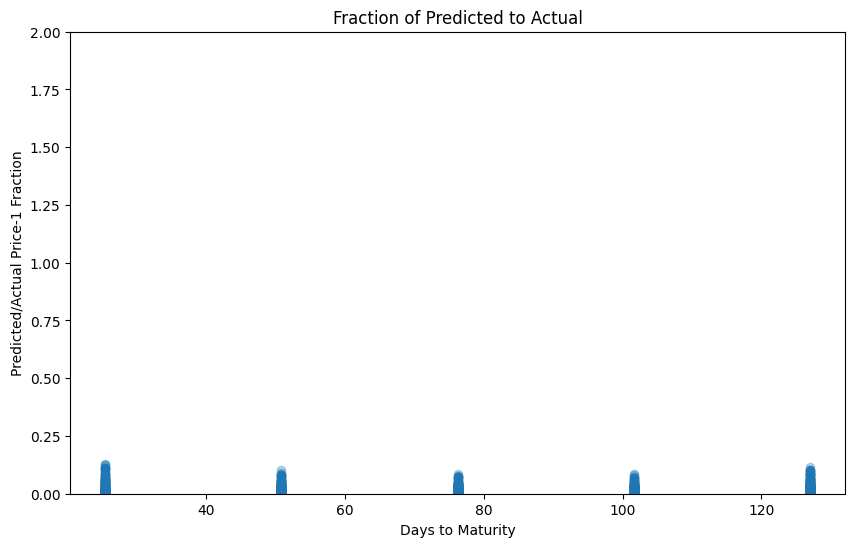

In [43]:

#y_test = y_test.reset_index(drop=True)
newper_y_pred_ML = pd.Series(y_pred_ML.flatten(), name='Predictions')
# Combine them into a DataFrame
frac__ML = pd.DataFrame({'Actual': y_test, 'Predicted': newper_y_pred_ML})

y_testf = frac__ML['Actual'].values
y_predf = frac__ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 2]*254,fractionsf, 'o', alpha=0.3)
plt.xlabel('Days to Maturity')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

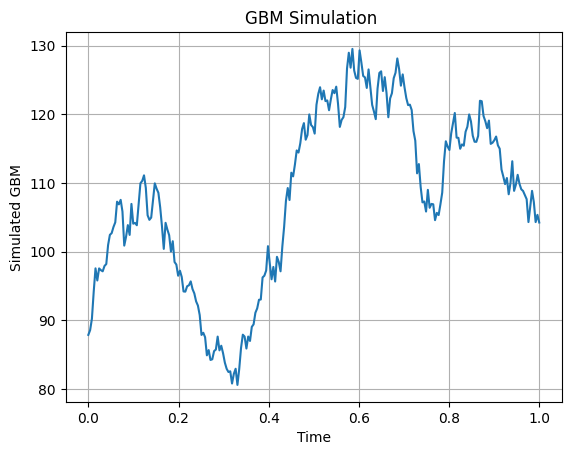

In [46]:
# Parameters
S0 = 85  # Initial value
mu = 0.1  # Drift coefficient
sigma = 0.3  # Volatility coefficient
T = 1  # Time horizon (1 year)
N = 252
dt = T / N  # Time step

# Generate the Brownian motion
np.random.seed(0)  # For reproducibility
W = np.random.standard_normal(size=N)
W = np.cumsum(W) * np.sqrt(dt)  # Standard Brownian motion

# Simulate GBM
t = np.linspace(0, T, N)
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Apply boundary conditions
#S = np.clip(S, 30, 170)

# Plot the result
plt.plot(t, S)
plt.xlabel('Time')
plt.ylabel('Simulated GBM')
plt.title('GBM Simulation ')
plt.grid(True)
plt.show()

In [25]:
# Parameters for Black-Scholes and ANN comparison
K = 120  # strike price
r = 0.05  # risk-free interest rate
sigma = 0.3  # implied volatility
T = 0.5  # time to maturity


# Black-Scholes prices
PriceBS = [EuropeanOptionBS(S_, K, T, r, 0, sigma, "Call").price for S_ in S]

# ANN predicted prices
PriceANN = [S_/100*\
            model_ML.predict(np.array([[r, K / S_*100, T, sigma]]))[0][0] for S_ in S]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

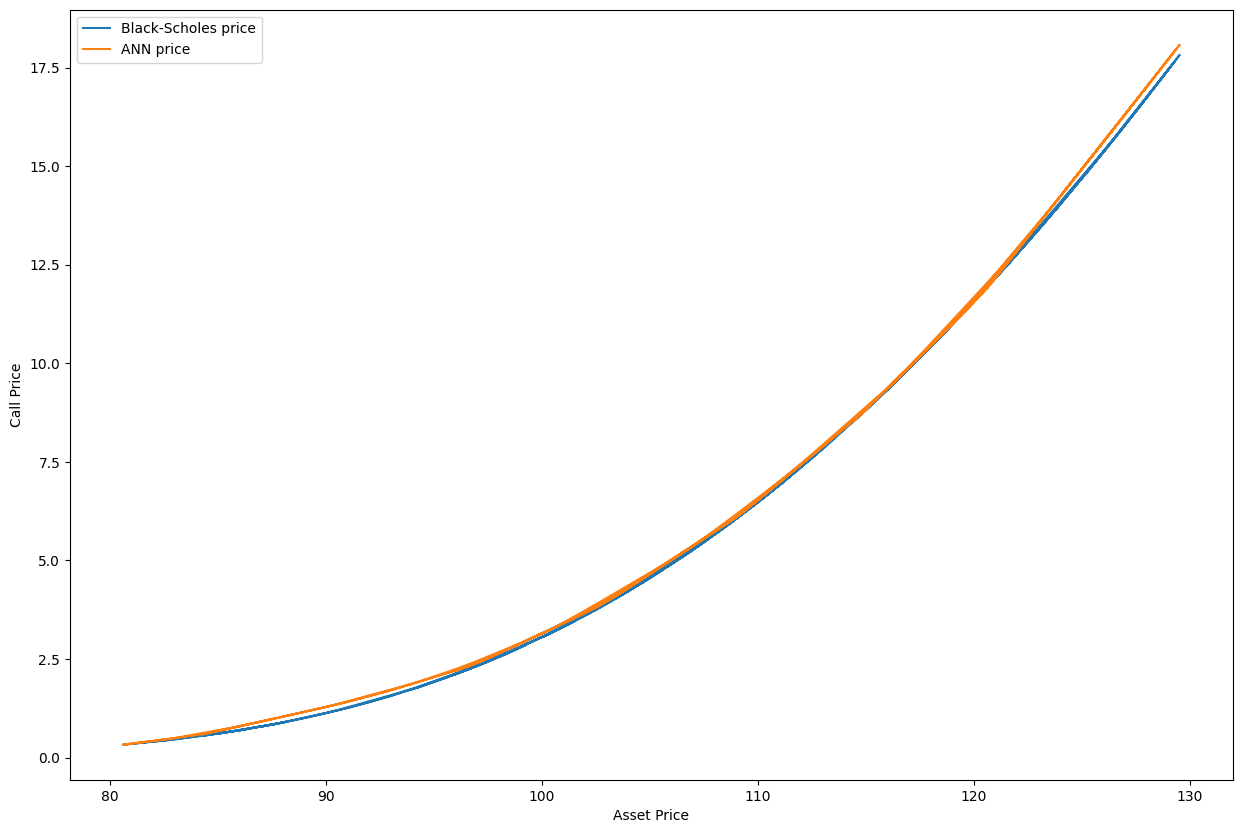

In [31]:
# Comparison of Black-Scholes and ANN prices
plt.figure(figsize=(15, 10))
plt.plot(S, PriceBS, label="Black-Scholes price")
plt.plot(S, PriceANN, label="ANN price")
plt.xlabel("Asset Price")
plt.ylabel("Call Price")
plt.legend()
plt.show()

In [32]:

#frac_ML = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_ML})
# Combine them into a DataFrame
frac_ML = pd.DataFrame({'Actual':(PriceBS), 'Predicted': (PriceANN)})



fractions statistics
Min: -0.0019009058232483111
Max: 0.16642417522764097
Mean: 0.031964319994694734
Std: 0.04315973798946512


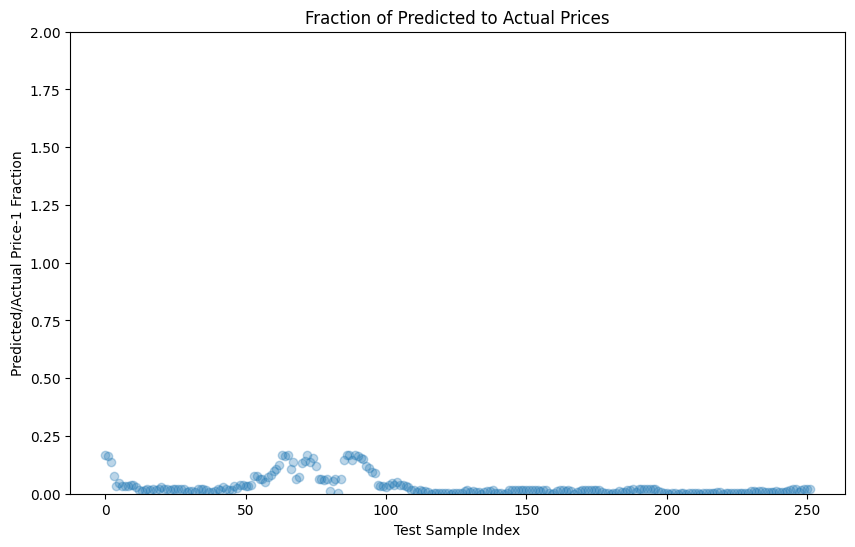

In [37]:


y_testf = frac_ML['Actual'].values
y_predf = frac_ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1

# Print statistics for fractions
print("fractions statistics")
print("Min:", np.min(fractionsf))
print("Max:", np.max(fractionsf))
print("Mean:", np.mean(fractionsf))
print("Std:", np.std(fractionsf))

# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(fractionsf, 'o', alpha=0.3)
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

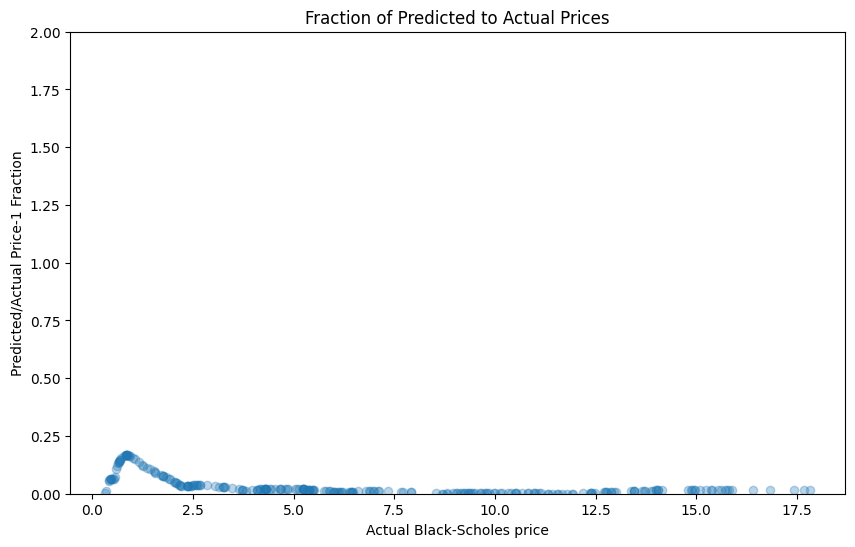

In [38]:

y_testf = frac_ML['Actual'].values
y_predf = frac_ML['Predicted'].values

# Calculate the fractions
fractionsf = y_predf / y_testf-1



# Plot the fractions
plt.figure(figsize=(10, 6))
plt.plot(frac_ML['Actual'],fractionsf, 'o', alpha=0.3)
plt.xlabel('Actual Black-Scholes price')
plt.ylabel('Predicted/Actual Price-1 Fraction')
plt.title('Fraction of Predicted to Actual Prices')
plt.ylim(0, 2)  # Limit the y-axis for better visualization if needed
plt.show()

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of call option prices
ax.scatter(data1[:, 2], data1[:, 3], data1[:, 4], c=data1[:, 4], cmap='viridis')

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Volatility')
ax.set_zlabel('Call Option Price')
ax.set_title('Call Option Prices with Black-Scholes Model')

plt.show()